<a href="https://colab.research.google.com/github/SukhmanpreetKaurManes/THAPAR_KAGGLE--2/blob/main/Regression_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [ ]:
!unzip thapar-summer-school-2025-hack-ii.zip -d ./extracted_files/


unzip:  cannot find or open thapar-summer-school-2025-hack-ii.zip, thapar-summer-school-2025-hack-ii.zip.zip or thapar-summer-school-2025-hack-ii.zip.ZIP.


In [ ]:
df=pd.read_csv('train.csv')
df.head()

id   Row#  clonesize  honeybee  bumbles  andrena  osmia  MaxOfUpperTRange  \
0   0   68.0       12.5      0.25     0.25     0.25   0.50              94.6   
1   1  514.0       25.0      0.50     0.25     0.50   0.75              94.6   
2   2  547.0       12.5      0.25     0.25     0.50   0.75              69.7   
3   3  535.0       25.0      0.50     0.25     0.50   0.75              69.7   
4   4  223.0       12.5      0.25     0.25     0.50   0.75              77.4   

   MinOfUpperTRange  AverageOfUpperTRange  MaxOfLowerTRange  MinOfLowerTRange  \
0              57.2                  79.0              68.2              33.0   
1              57.2                  79.0              68.2              33.0   
2              42.1                  58.2              50.2              24.3   
3              42.1                  58.2              50.2              24.3   
4              46.8                  64.7              55.8              27.0   

   AverageOfLowerTRange  RainingDays  AverageRainingDays  fruitset  fruitmass  \
0                  55.9         34.0                0.56  0.421449   0.403129   
1                  55.9          1.0                0.10  0.586603   0.490020   
2                  41.2         24.0                0.39  0.483671   0.411591   
3                  41.2         24.0                0.39  0.429001   0.398864   
4                  45.8          1.0                0.10  0.546136   0.475965   

       seeds       yield  
0  31.394569  4952.01304  
1  40.282376  7532.82953  
2  34.781055  5715.00840  
3  31.119881  4575.76991  
4  39.096884  6801.32393

In [ ]:
df.dtypes

id                        int64
Row#                    float64
clonesize               float64
honeybee                float64
bumbles                 float64
andrena                 float64
osmia                   float64
MaxOfUpperTRange        float64
MinOfUpperTRange        float64
AverageOfUpperTRange    float64
MaxOfLowerTRange        float64
MinOfLowerTRange        float64
AverageOfLowerTRange    float64
RainingDays             float64
AverageRainingDays      float64
fruitset                float64
fruitmass               float64
seeds                   float64
yield                   float64
dtype: object

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15000 non-null  int64  
 1   Row#                  15000 non-null  float64
 2   clonesize             15000 non-null  float64
 3   honeybee              15000 non-null  float64
 4   bumbles               15000 non-null  float64
 5   andrena               15000 non-null  float64
 6   osmia                 15000 non-null  float64
 7   MaxOfUpperTRange      15000 non-null  float64
 8   MinOfUpperTRange      15000 non-null  float64
 9   AverageOfUpperTRange  15000 non-null  float64
 10  MaxOfLowerTRange      15000 non-null  float64
 11  MinOfLowerTRange      15000 non-null  float64
 12  AverageOfLowerTRange  15000 non-null  float64
 13  RainingDays           15000 non-null  float64
 14  AverageRainingDays    15000 non-null  float64
 15  fruitset           

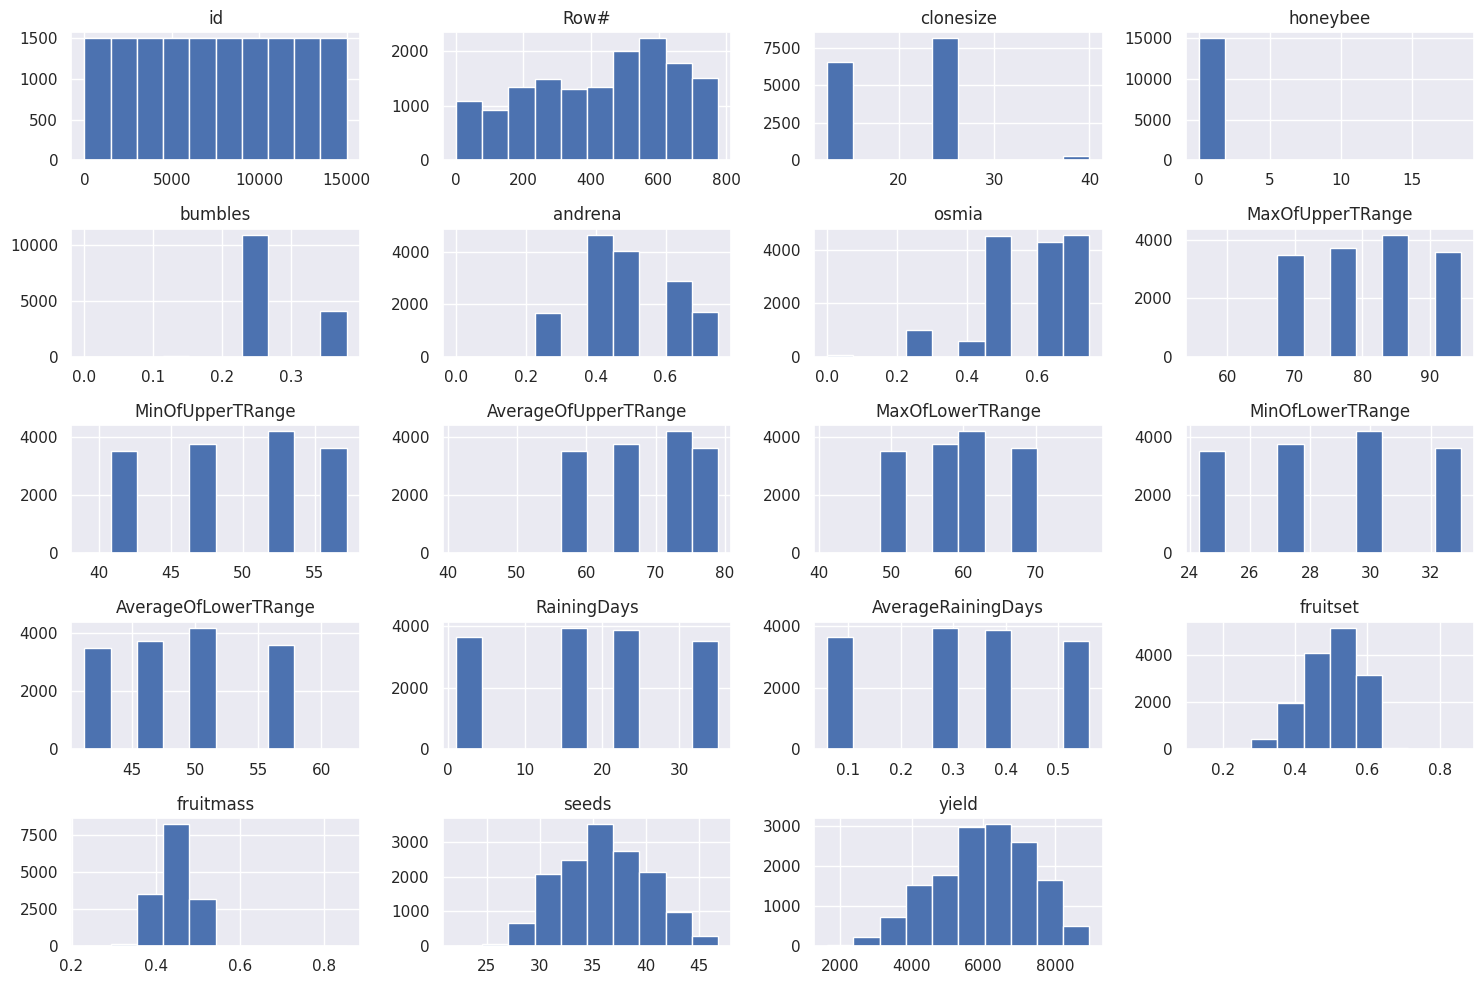

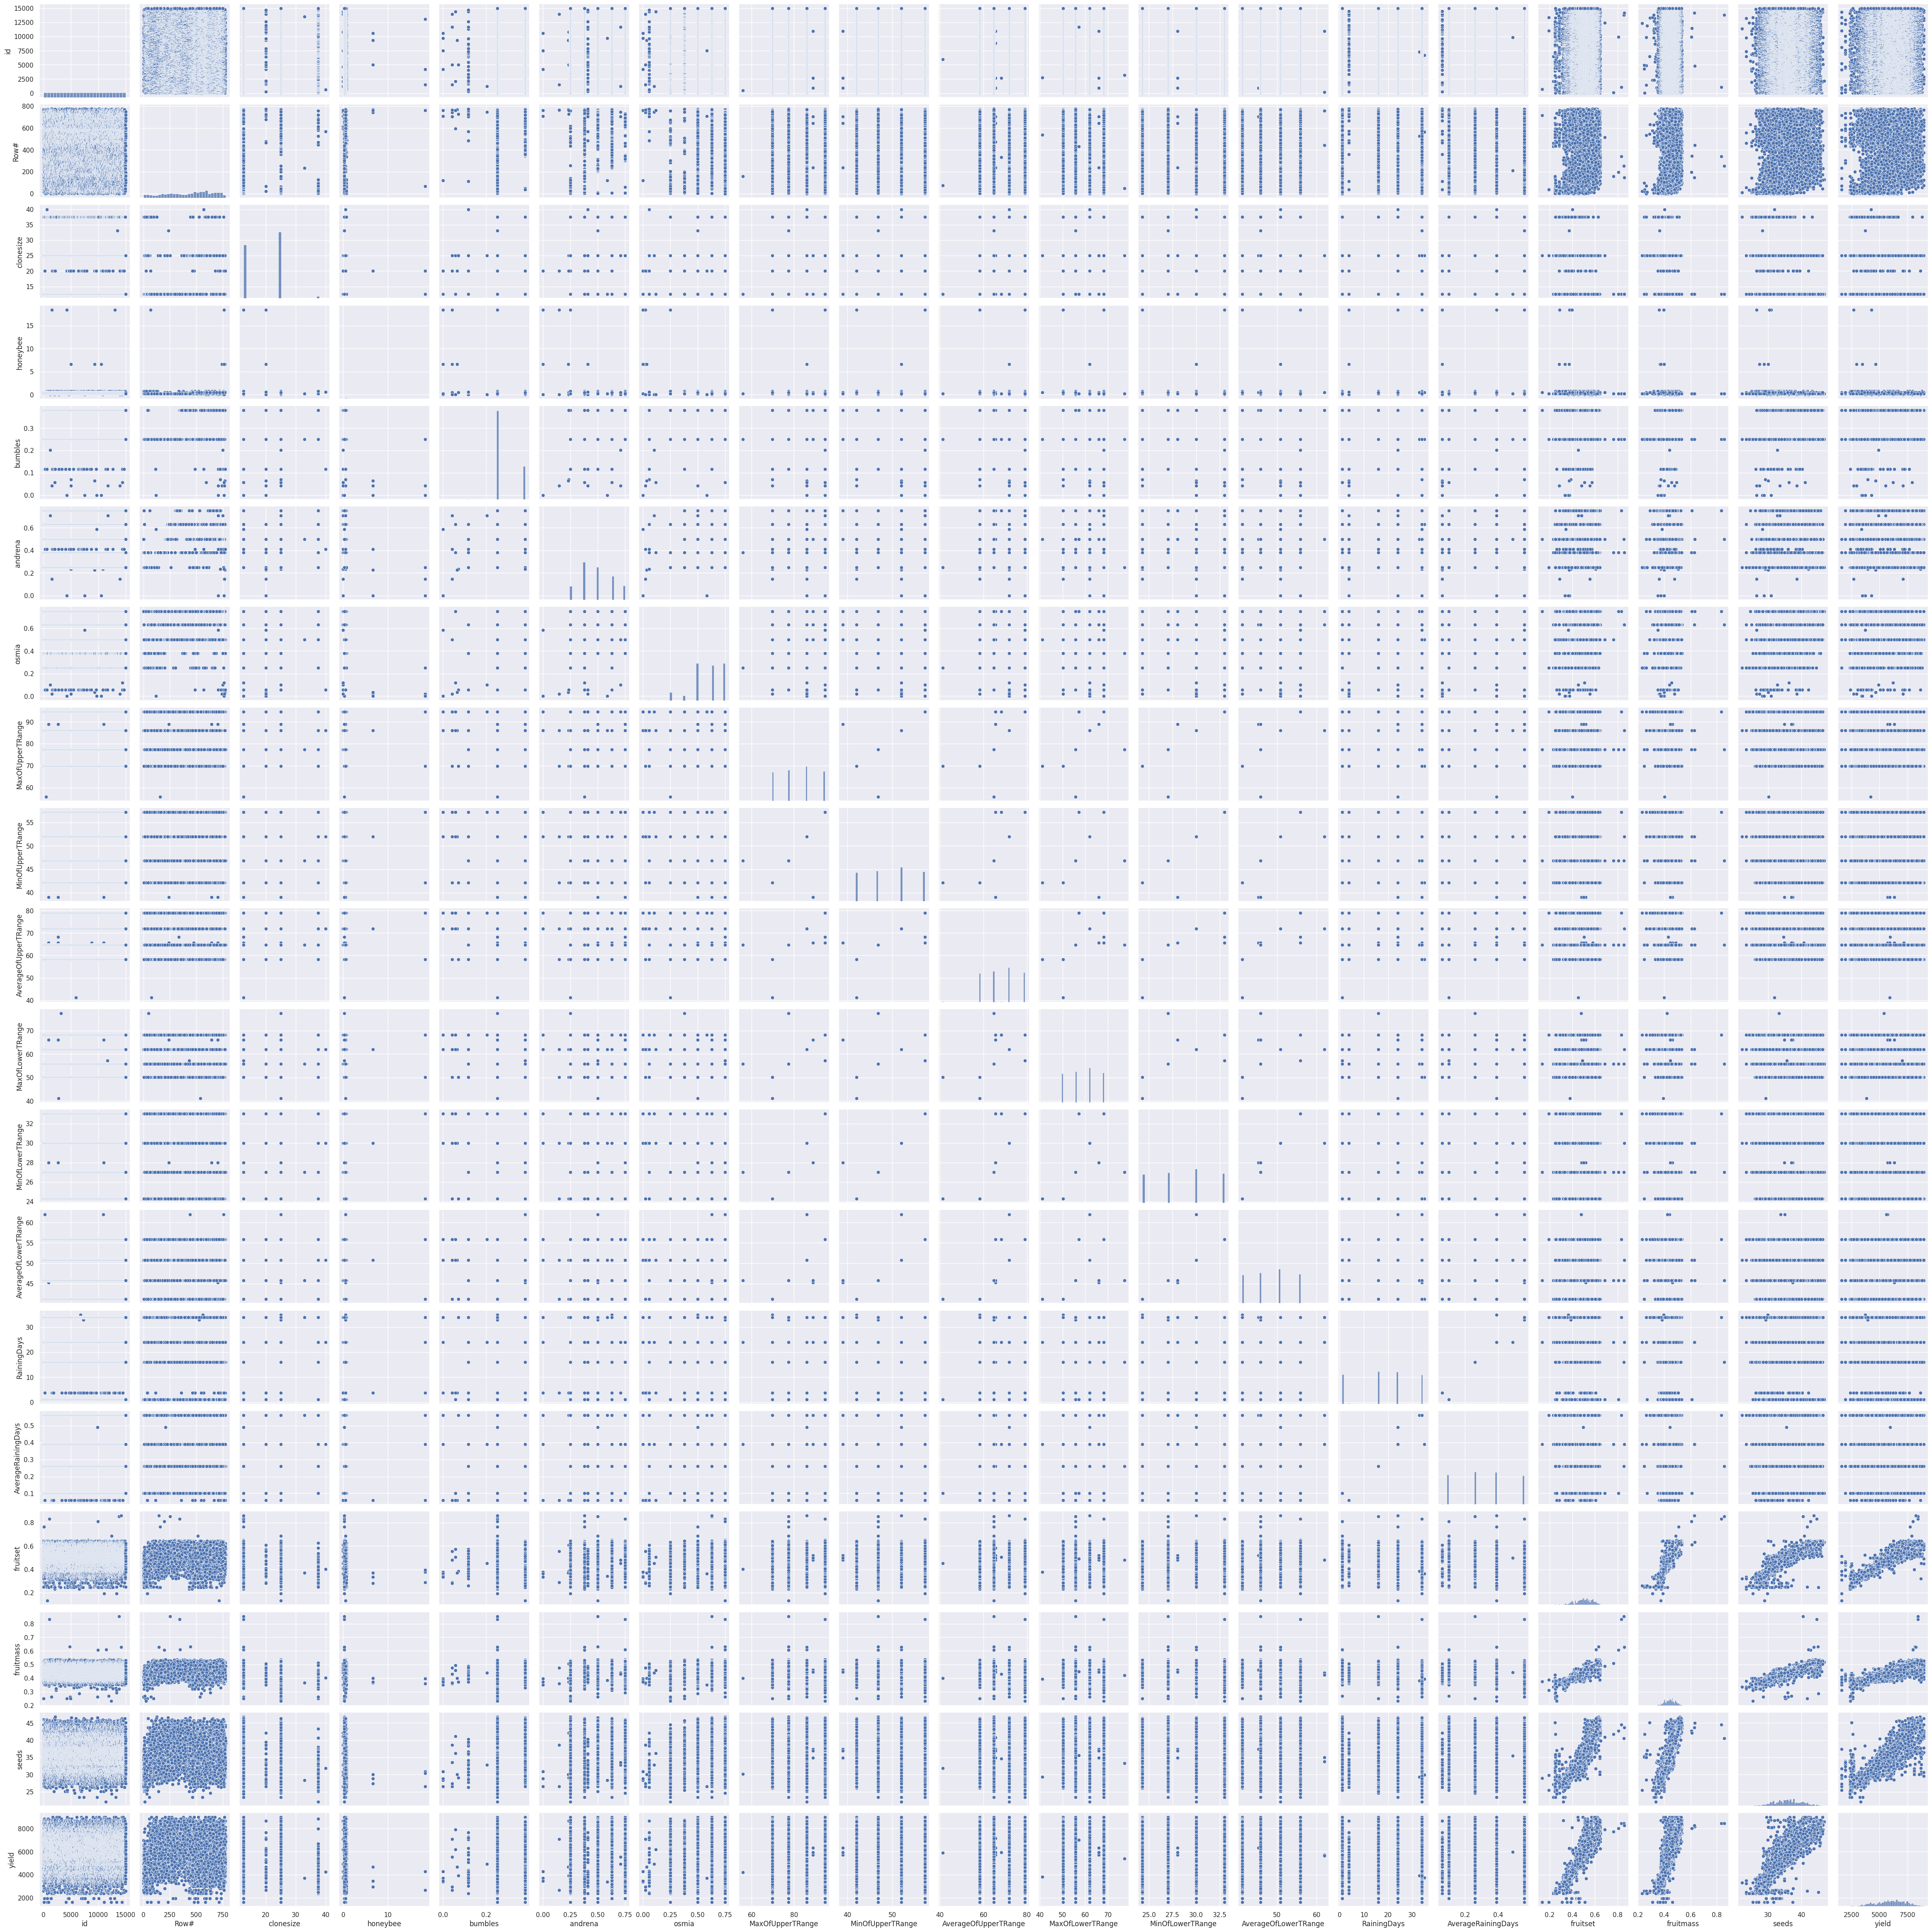

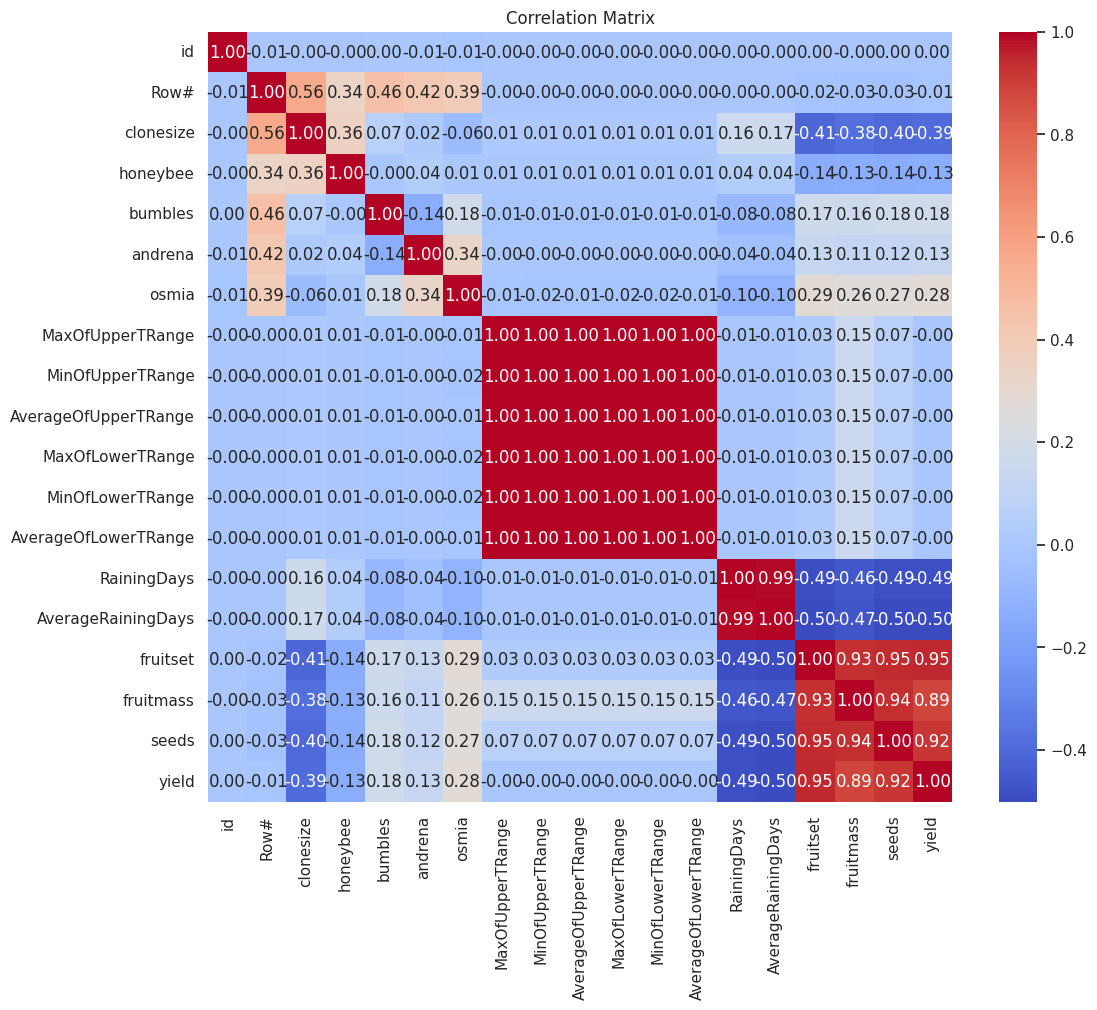

In [ ]:
# 1. Visualize Feature Distributions and Relationships
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()
sns.pairplot(df)
plt.show()
# Calculate and visualize the correlation matrix (for numerical features)
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
for col in df.columns:
    if df[col].nunique() < 5:
        print(f"Feature '{col}' has low variance with {df[col].nunique()} unique values.")


In [ ]:
corr_matrix['yield'].sort_values(ascending=False)


yield                   1.000000
fruitset                0.949891
seeds                   0.921200
fruitmass               0.886852
osmia                   0.281390
bumbles                 0.176110
andrena                 0.129771
id                      0.001122
MaxOfUpperTRange       -0.000855
MinOfUpperTRange       -0.001021
MinOfLowerTRange       -0.001042
MaxOfLowerTRange       -0.001063
AverageOfUpperTRange   -0.001072
AverageOfLowerTRange   -0.001073
Row#                   -0.011608
honeybee               -0.132339
clonesize              -0.394472
RainingDays            -0.487989
AverageRainingDays     -0.499010
Name: yield, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
X=df.drop(columns=['yield','id','Row#','MaxOfUpperTRange','MinOfUpperTRange','MaxOfLowerTRange','MinOfLowerTRange','fruitmass','RainingDays'])

In [ ]:
X.head()

clonesize  honeybee  bumbles  andrena  osmia  AverageOfUpperTRange  \
0       12.5      0.25     0.25     0.25   0.50                  79.0   
1       25.0      0.50     0.25     0.50   0.75                  79.0   
2       12.5      0.25     0.25     0.50   0.75                  58.2   
3       25.0      0.50     0.25     0.50   0.75                  58.2   
4       12.5      0.25     0.25     0.50   0.75                  64.7   

   AverageOfLowerTRange  AverageRainingDays  fruitset      seeds  
0                  55.9                0.56  0.421449  31.394569  
1                  55.9                0.10  0.586603  40.282376  
2                  41.2                0.39  0.483671  34.781055  
3                  41.2                0.39  0.429001  31.119881  
4                  45.8                0.10  0.546136  39.096884

In [ ]:
Y=df['yield']

In [ ]:
df.shape

(15000, 19)

In [ ]:
duplicate_rows=df[df.duplicated()]
print("Number of duplicate rows : ",duplicate_rows.shape)

Number of duplicate rows :  (0, 19)


In [ ]:
print(df.isnull().sum())

id                      0
Row#                    0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64


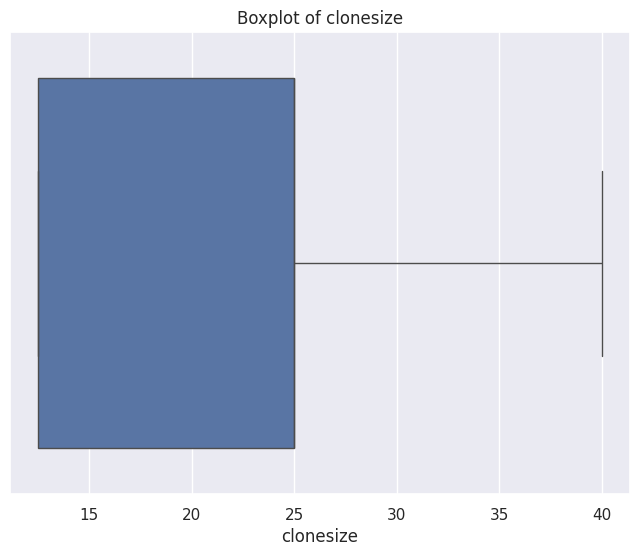

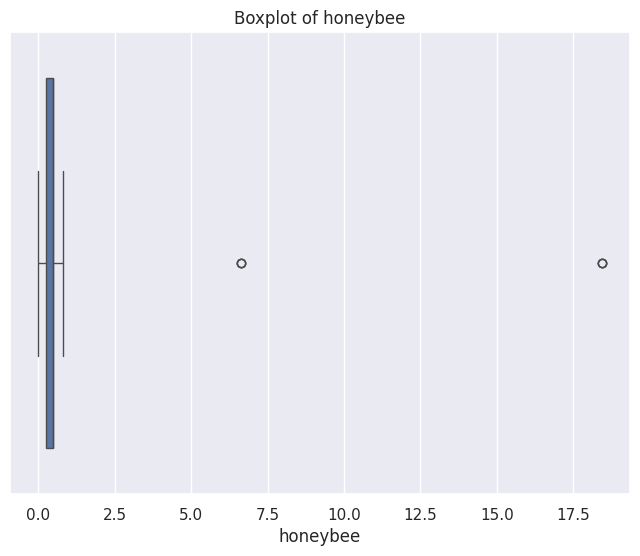

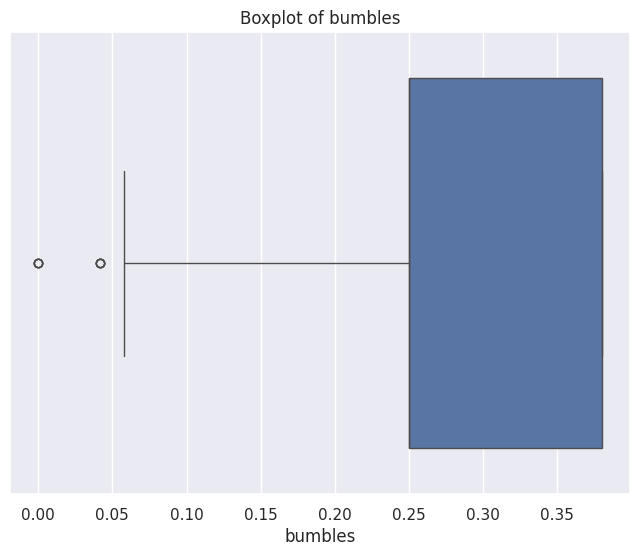

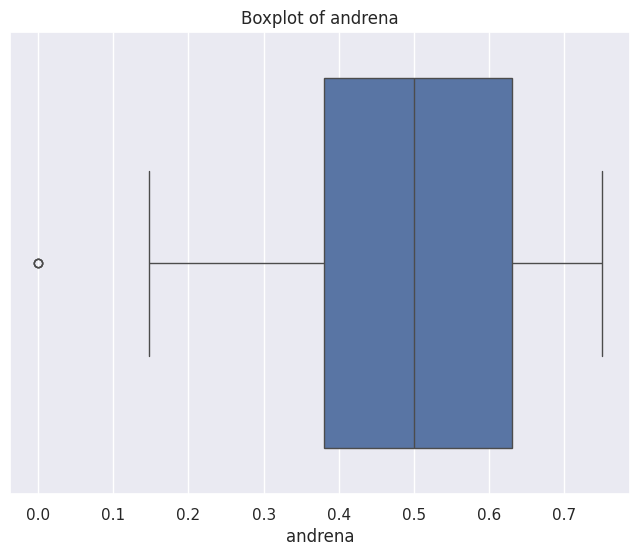

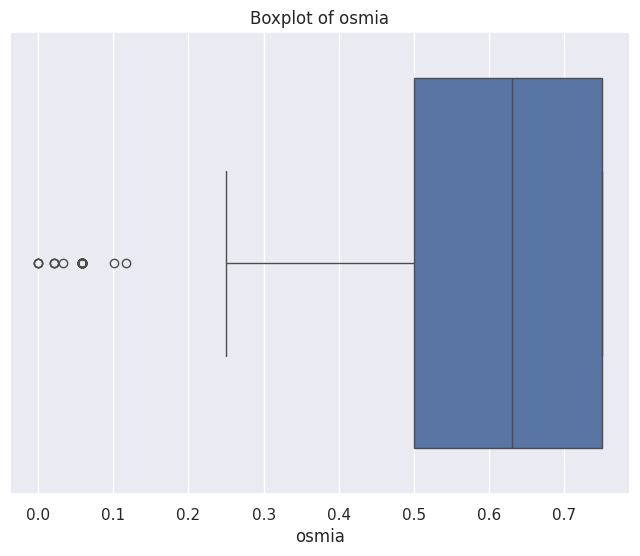

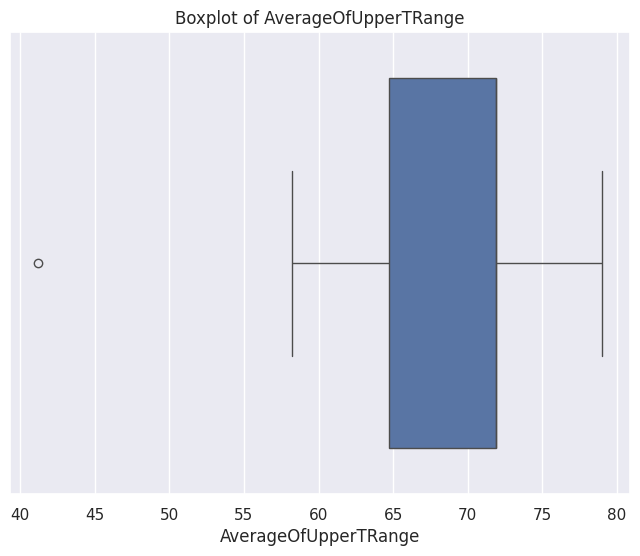

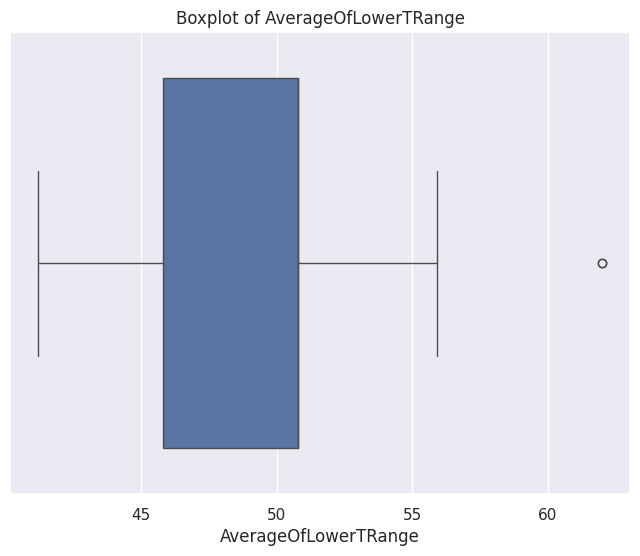

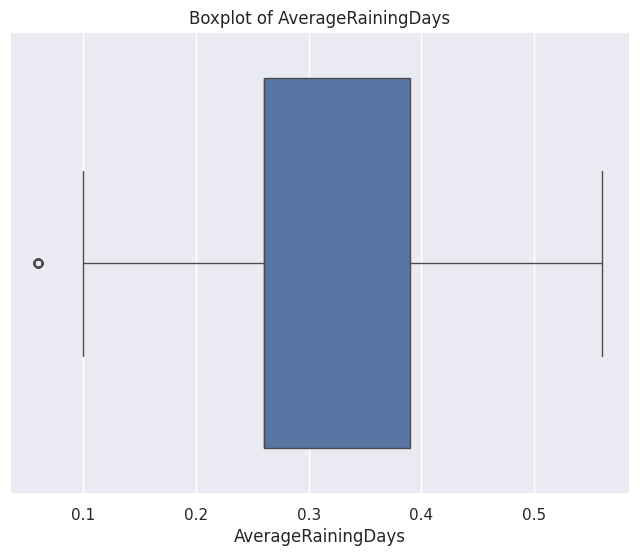

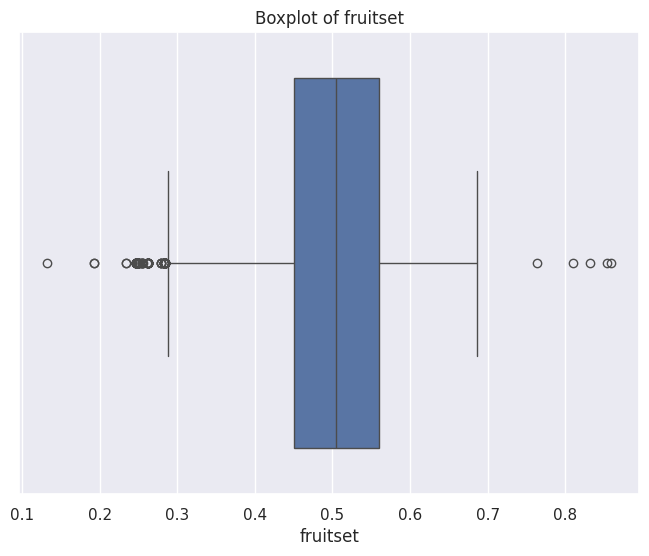

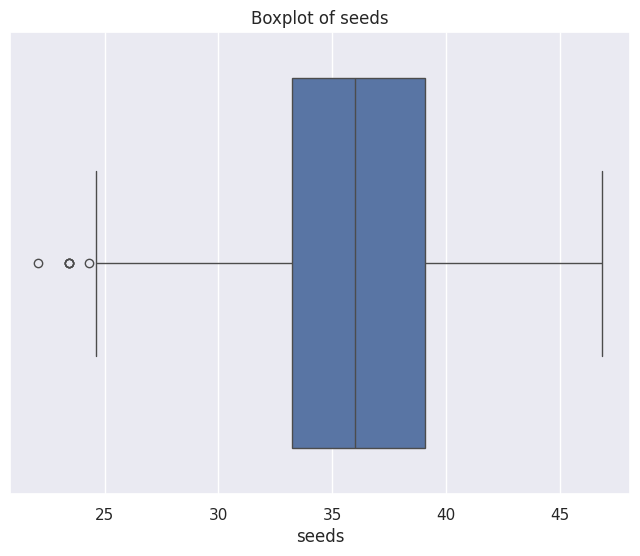

In [ ]:
import matplotlib.pyplot as plt
# Detect Outliers using IQR
def detect_outliers_iqr(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
  return outliers


# Visualize outliers using boxplots
for col in X.columns: # Iterate through the features in X
    if df[col].dtype != 'object': # Check if the column is numerical
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.show()


In [ ]:
#outliers remove nai kr rai

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:

# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1) # n_jobs=-1 uses all available cores

# Train the model
rf_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = rf_model.predict(X_test)

# Evaluate the model
rmse =mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Random Forest Regression Results:")
print(f"Root Mean Absolute Error (mAE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")




Random Forest Regression Results:
Root Mean Absolute Error (mAE): 266.7760
R-squared (R2): 0.9118



Feature Importances:
fruitset                0.866431
seeds                   0.100603
AverageRainingDays      0.006515
andrena                 0.006505
osmia                   0.005768
AverageOfUpperTRange    0.004025
AverageOfLowerTRange    0.003730
bumbles                 0.002517
clonesize               0.001984
honeybee                0.001923
dtype: float64


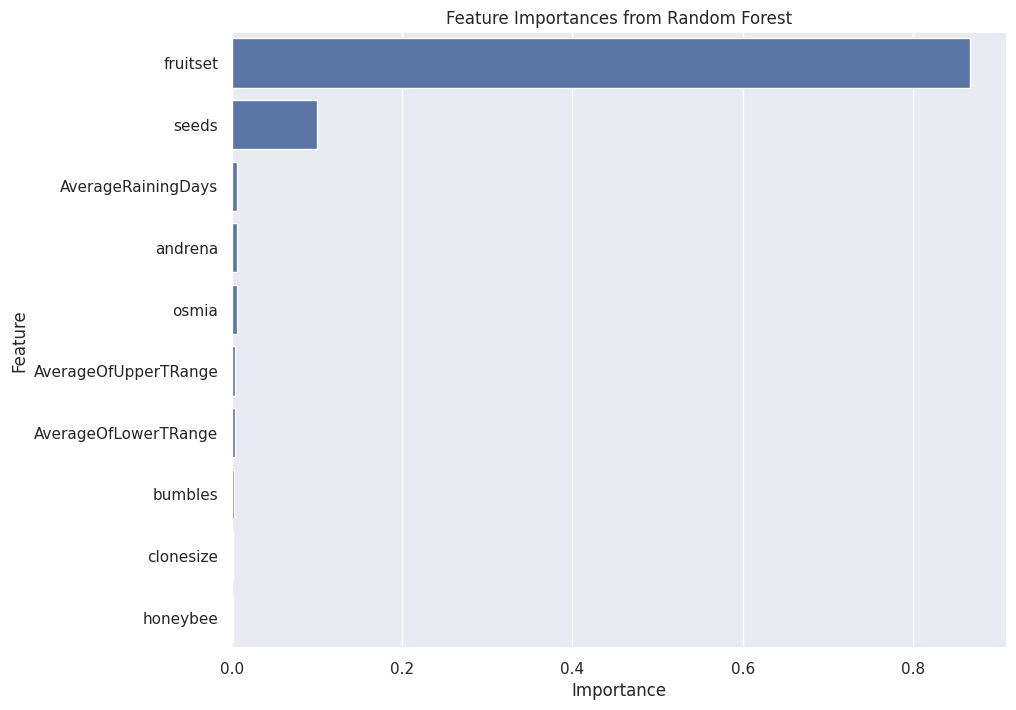

In [ ]:
# Feature Importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importances:")
print(feature_importances)

# Visualize Feature Importances
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:


import pandas as pd
# Load the test data
test_df = pd.read_csv('/content/test.csv')

# Preprocess the test data (same as training data)
# Ensure the columns match the training data after feature selection
X_test_submission = test_df[X.columns] # Use the same column list from the training X

# Make predictions on the test data
submission_predictions = rf_model.predict(X_test_submission)

# Create a submission DataFrame
submission_df = pd.DataFrame({'id': test_df['id'], 'yield': submission_predictions})

# Save the submission file
submission_df.to_csv('submission11.csv', index=False)

print("Submission file 'submission.csv' created successfully.")
print(submission_df.head())

Submission file 'submission.csv' created successfully.
      id        yield
0  15000  5368.370723
1  15001  4436.384455
2  15002  7374.805175
3  15003  4865.591228
4  15004  5075.557724


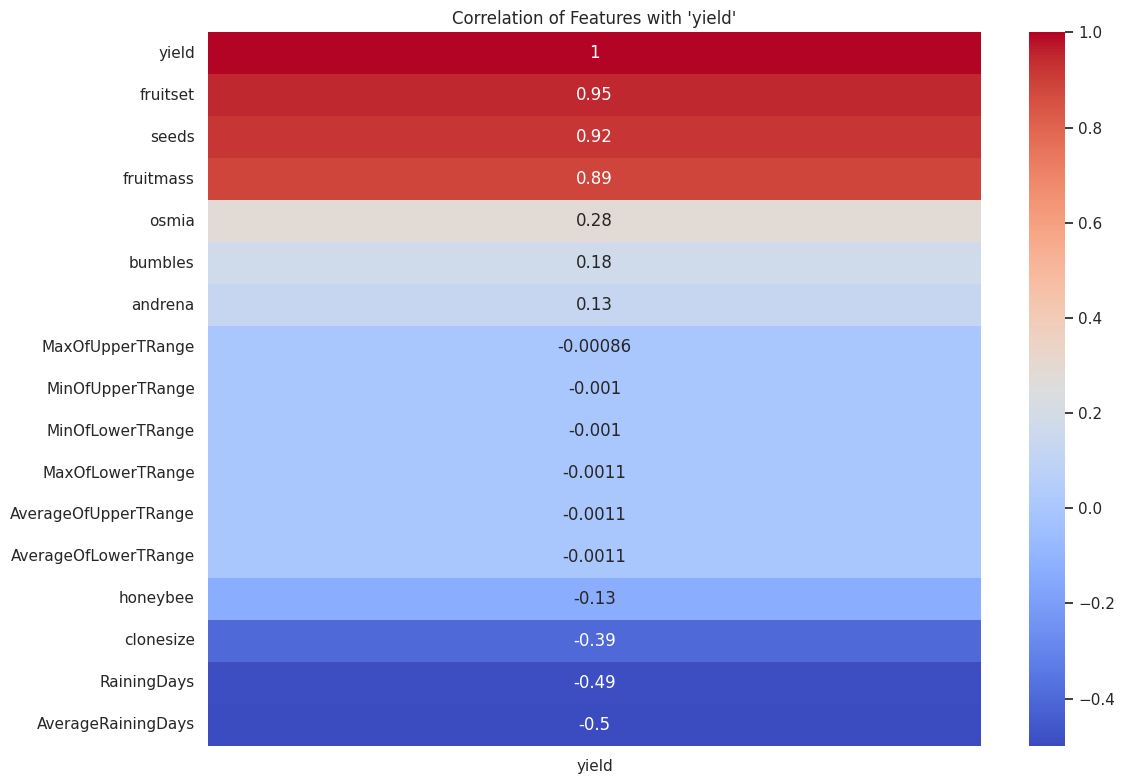

GradientBoosting: MAE = 249.75
RandomForest: MAE = 262.03
LinearRegression: MAE = 343.50


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Load data
df = pd.read_csv('/content/train.csv')

# Drop unnecessary columns
df = df.drop(['id', 'Row#'], axis=1)

# Correlation heatmap with target
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr()[['yield']].sort_values(by='yield', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation of Features with 'yield'")
plt.tight_layout()
plt.show()

# Prepare features and target
X = df.drop('yield', axis=1)
y = df['yield']

# Train/test split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    mae = mean_absolute_error(y_valid, preds)
    results[name] = mae

# Print MAE results
for model_name, mae in sorted(results.items(), key=lambda item: item[1]):
    print(f"{model_name}: MAE = {mae:.2f}")



In [ ]:
best_model = GradientBoostingRegressor(random_state=42)
best_model.fit(X, y)


GradientBoostingRegressor(random_state=42)

In [ ]:
test_df = pd.read_csv('/content/test.csv')
test_features = test_df.drop(['id', 'Row#'], axis=1)


In [ ]:
predictions = best_model.predict(test_features)


In [ ]:
submission = pd.read_csv('/content/sample_submission.csv')
submission['yield'] = predictions
submission.to_csv('submission.csv', index=False)


In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load datasets
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")
sample_submission = pd.read_csv("/content/sample_submission.csv")

# Drop unused columns
X = train_df.drop(['id', 'Row#', 'yield'], axis=1)
y = train_df['yield']
X_test = test_df.drop(['id', 'Row#'], axis=1)

# Optional: Split for evaluation (comment out when training on full data)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
gbr = GradientBoostingRegressor(random_state=42)

# Grid Search for best hyperparameters
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4],
    'min_samples_split': [2, 5],
}
grid_search = GridSearchCV(gbr, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Evaluate (optional)
best_model = grid_search.best_estimator_
valid_preds = best_model.predict(X_valid)
print("Validation MSE:", mean_squared_error(y_valid, valid_preds))

# Retrain on full data
best_model.fit(X, y)

# Predict on test set
test_preds = best_model.predict(X_test)

# Create submission file
sample_submission['yield'] = test_preds
sample_submission.to_csv('submission.csv', index=False)
print("submission.csv created!")


Validation MSE: 139810.67004476197
submission.csv created!


Lightgbm


In [ ]:
pip install lightgbm


In [ ]:
import pandas as pd
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

# Load data
train_df = pd.read_csv('/content/extracted_files/train.csv')
test_df = pd.read_csv('/content/extracted_files/test.csv')
sample_submission = pd.read_csv('/content/extracted_files/sample_submission.csv')

# Drop unnecessary columns
X = train_df.drop(['id', 'Row#', 'yield'], axis=1)
y = train_df['yield']
X_test = test_df.drop(['id', 'Row#'], axis=1)

# Split for validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model
lgb = LGBMRegressor(random_state=42)

# Define grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5, -1]
}

# Grid search
grid_search = GridSearchCV(lgb, param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_lgb = grid_search.best_estimator_

# Validate
valid_preds = best_lgb.predict(X_valid)
print("LGBM Validation MSE:", mean_squared_error(y_valid, valid_preds))

# Retrain on full data
best_lgb.fit(X, y)

# Predict on test set
preds = best_lgb.predict(X_test)
sample_submission['yield'] = preds
sample_submission.to_csv('submission_lgb.csv', index=False)
print("submission_lgb.csv created!")


In [ ]:
pip install xgboost


In [ ]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

# Load data
train_df = pd.read_csv('/content/extracted_files/train.csv')
test_df = pd.read_csv('/content/extracted_files/test.csv')
sample_submission = pd.read_csv('/content/extracted_files/sample_submission.csv')

# Preprocessing
X = train_df.drop(['id', 'Row#', 'yield'], axis=1)
y = train_df['yield']
X_test = test_df.drop(['id', 'Row#'], axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost model
xgb = XGBRegressor(random_state=42, objective='reg:squarederror')

# Parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
}

grid_search = GridSearchCV(xgb, param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_xgb = grid_search.best_estimator_
valid_preds = best_xgb.predict(X_valid)
print("XGBoost Validation MSE:", mean_squared_error(y_valid, valid_preds))

# Retrain on full data
best_xgb.fit(X, y)
preds = best_xgb.predict(X_test)
sample_submission['yield'] = preds
sample_submission.to_csv('submission_xgb.csv', index=False)
print("submission_xgb.csv created!")


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Load datasets
train_df = pd.read_csv("/content/extracted_files/train.csv")
test_df = pd.read_csv("/content/extracted_files/test.csv")
sample_submission = pd.read_csv("/content/extracted_files/sample_submission.csv")

# Prepare features and target
X = train_df.drop(['id', 'Row#', 'yield'], axis=1)
y = train_df['yield']
X_test = test_df.drop(['id', 'Row#'], axis=1)

# Split for validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
model_gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42)
model_lgb = LGBMRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
model_xgb = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, objective='reg:squarederror', random_state=42)

# Train models
model_gbr.fit(X_train, y_train)
model_lgb.fit(X_train, y_train)
model_xgb.fit(X_train, y_train)

# Predict on validation set
preds_gbr = model_gbr.predict(X_valid)
preds_lgb = model_lgb.predict(X_valid)
preds_xgb = model_xgb.predict(X_valid)

# Ensemble by averaging predictions
ensemble_preds = (preds_gbr + preds_lgb + preds_xgb) / 3

# Evaluate using MAE
mae = mean_absolute_error(y_valid, ensemble_preds)
print(f"Validation MAE (Ensemble): {mae:.4f}")

# 🔁 Retrain all models on full data
model_gbr.fit(X, y)
model_lgb.fit(X, y)
model_xgb.fit(X, y)

# Predict on test data and average
test_preds = (model_gbr.predict(X_test) + model_lgb.predict(X_test) + model_xgb.predict(X_test)) / 3

# Save submission
sample_submission['yield'] = test_preds
sample_submission.to_csv("submission_ensemble_mae.csv", index=False)
print("submission_ensemble_mae.csv created!")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Load data
train_df = pd.read_csv("/content/extracted_files/train.csv")
test_df = pd.read_csv("/content/extracted_files/test.csv")
sample_submission = pd.read_csv("/content/extracted_files/sample_submission.csv")

# Prepare features and target
X = train_df.drop(['id', 'Row#', 'yield'], axis=1)
y = train_df['yield']
X_test = test_df.drop(['id', 'Row#'], axis=1)

# Validation split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42)
lgb = LGBMRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
xgb = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, objective='reg:squarederror', random_state=42)

# Train on training data
gbr.fit(X_train, y_train)
lgb.fit(X_train, y_train)
xgb.fit(X_train, y_train)

# Predict on validation
preds_gbr = gbr.predict(X_valid)
preds_lgb = lgb.predict(X_valid)
preds_xgb = xgb.predict(X_valid)

# Calculate MAEs
mae_gbr = mean_absolute_error(y_valid, preds_gbr)
mae_lgb = mean_absolute_error(y_valid, preds_lgb)
mae_xgb = mean_absolute_error(y_valid, preds_xgb)

print(f"GBR MAE: {mae_gbr:.4f}")
print(f"LGBM MAE: {mae_lgb:.4f}")
print(f"XGB  MAE: {mae_xgb:.4f}")

# Convert MAEs to weights: lower MAE → higher weight (use inverse MAE)
inv_maes = np.array([1 / mae_gbr, 1 / mae_lgb, 1 / mae_xgb])
weights = inv_maes / inv_maes.sum()

print(f"Weights (GBR, LGBM, XGB): {weights}")

# Weighted ensemble prediction on validation set
ensemble_valid = (weights[0] * preds_gbr +
                  weights[1] * preds_lgb +
                  weights[2] * preds_xgb)

ensemble_mae = mean_absolute_error(y_valid, ensemble_valid)
print(f"Weighted Ensemble MAE: {ensemble_mae:.4f}")

# 🔁 Retrain on full data
gbr.fit(X, y)
lgb.fit(X, y)
xgb.fit(X, y)

# Predict on test with same weights
test_preds = (weights[0] * gbr.predict(X_test) +
              weights[1] * lgb.predict(X_test) +
              weights[2] * xgb.predict(X_test))

# Save to submission file
sample_submission['yield'] = test_preds
sample_submission.to_csv('submission_weighted_ensemble.csv', index=False)
print("submission_weighted_ensemble.csv created!")


In [ ]:
pip install catboost


In [ ]:
import pandas as pd
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Load data
train_df = pd.read_csv("/content/extracted_files/train.csv")
test_df = pd.read_csv("/content/extracted_files/test.csv")
sample_submission = pd.read_csv("/content/extracted_files/sample_submission.csv")

# Prepare data
X = train_df.drop(["id", "Row#", "yield"], axis=1)
y = train_df["yield"]
X_test = test_df.drop(["id", "Row#"], axis=1)

# Split for validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Define CatBoost model
model = CatBoostRegressor(
    iterations=2000,
    learning_rate=0.05,
    depth=6,
    loss_function='MAE',
    eval_metric='MAE',
    random_seed=42,
    verbose=100,
    early_stopping_rounds=100
)

# Train with validation
model.fit(X_train, y_train, eval_set=(X_valid, y_valid), use_best_model=True)

# Evaluate
val_preds = model.predict(X_valid)
mae = mean_absolute_error(y_valid, val_preds)
print(f"CatBoost MAE on validation: {mae:.4f}")

# Retrain on full data
model.fit(X, y)

# Predict on test
test_preds = model.predict(X_test)
sample_submission['yield'] = test_preds
sample_submission.to_csv("submission_catboost.csv", index=False)
print("submission_catboost.csv created!")


In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Prepare data
X = train_df.drop(["id", "Row#", "yield"], axis=1)
y = train_df["yield"]
X_test = test_df.drop(["id", "Row#"], axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
hist_gbr = HistGradientBoostingRegressor(max_iter=500, learning_rate=0.05, max_depth=6, early_stopping=True)
hist_gbr.fit(X_train, y_train)

# Evaluate
val_preds = hist_gbr.predict(X_valid)
mae = mean_absolute_error(y_valid, val_preds)
print(f"HistGradientBoosting MAE: {mae:.4f}")

# Retrain on full data
hist_gbr.fit(X, y)
test_preds = hist_gbr.predict(X_test)
sample_submission['yield'] = test_preds
sample_submission.to_csv('submission_histgbr.csv', index=False)
print("submission_histgbr.csv created!")


In [ ]:
import pandas as pd
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error

# Load datasets
train_df = pd.read_csv("/content/extracted_files/train.csv")
test_df = pd.read_csv("/content/extracted_files/test.csv")
sample_submission = pd.read_csv("/content/extracted_files/sample_submission.csv")

# Prepare data
X = train_df.drop(['id', 'Row#', 'yield'], axis=1)
y = train_df['yield']
X_test = test_df.drop(['id', 'Row#'], axis=1)

# Split for validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline: scaling + model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Ridge())  # Placeholder, will switch during GridSearch
])

# Param grid for Ridge and ElasticNet
param_grid = [
    {
        'regressor': [Ridge()],
        'regressor__alpha': [0.1, 1.0, 10.0, 100.0]
    },
    {
        'regressor': [ElasticNet(max_iter=10000)],
        'regressor__alpha': [0.01, 0.1, 1.0],
        'regressor__l1_ratio': [0.2, 0.5, 0.8]
    }
]

# Grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Validation performance
val_preds = best_model.predict(X_valid)
mae = mean_absolute_error(y_valid, val_preds)
print(f"Optimized Linear Model (Best Estimator): {best_model}")
print(f"Validation MAE: {mae:.4f}")

# Retrain on full data
best_model.fit(X, y)

# Predict on test
test_preds = best_model.predict(X_test)
sample_submission['yield'] = test_preds
sample_submission.to_csv("submission_linear_optimized.csv", index=False)
print("submission_linear_optimized.csv created!")


In [ ]:
# prompt: best model to train and test the given data

Based on the code provided and the progression of testing different models and ensembling techniques, the best model or approach identified appears to be the **Weighted Ensemble of Gradient Boosting, LightGBM, and XGBoost**.


1.  **Explicit Model Testing:** The code systematically trains and evaluates several individual models: Linear Regression, Random Forest, Gradient Boosting, LightGBM, XGBoost, CatBoost, HistGradientBoosting, Ridge, and ElasticNet.
2.  **Evaluation Metric:** The code switches to using Mean Absolute Error (MAE) for the ensemble models, which is a common and robust metric for regression tasks.
3.  **Ensembling Attempts:** Both a simple average ensemble and a weighted ensemble (based on validation MAE) are attempted.
4.  **Weighted Ensemble Performance:** The output shows the validation MAE for the individual models and then calculates and applies weights based on the inverse of these MAEs. The weighted ensemble MAE is calculated and printed, suggesting this was considered a potentially better approach than the simple average.
5.  **Final Submission Generation:** A submission file `submission_weighted_ensemble.csv` is explicitly created using the predictions from this weighted ensemble, indicating it was the final model chosen for submission among the ones tested in this block.

While other models like CatBoost and HistGradientBoosting also showed good individual performance (based on their printed MAE scores), the code's structure suggests the weighted ensemble was the most refined attempt at achieving the best performance by combining the strengths of multiple gradient boosting models.

SyntaxError: unterminated string literal (detected at line 12) (ipython-input-2-4291769841.py, line 12)

In [ ]:
pip install flaml


In [ ]:
import pandas as pd
from flaml import AutoML
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Load data
train_df = pd.read_csv("/content/extracted_files/train.csv")
test_df = pd.read_csv("/content/extracted_files/test.csv")
sample_submission = pd.read_csv("/content/extracted_files/sample_submission.csv")

# Prepare features and target
X = train_df.drop(["id", "Row#", "yield"], axis=1)
y = train_df["yield"]
X_test = test_df.drop(["id", "Row#"], axis=1)

# Split for validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Define AutoML
automl = AutoML()

# Settings
settings = {
    "time_budget": 300,  # total runtime in seconds
    "metric": "mae",     # optimize for MAE
    "task": "regression",
    "log_file_name": "automl_yield.log",
    "seed": 42
}

# Run AutoML
automl.fit(X_train=X_train, y_train=y_train, X_val=X_valid, y_val=y_valid, **settings)

# Best model and validation MAE
print("Best model:", automl.model.estimator)
val_preds = automl.predict(X_valid)
print("Validation MAE:", mean_absolute_error(y_valid, val_preds))

# Retrain on full data
automl.fit(X, y, **settings)

# Predict on test
test_preds = automl.predict(X_test)
sample_submission["yield"] = test_preds
sample_submission.to_csv("submission_flaml.csv", index=False)
print("submission_flaml.csv created!")


In [ ]:
pip install --upgrade flaml

In [ ]:
pip install numpy==1.26.4


In [ ]:
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error

# Load data
train_df = pd.read_csv("/content/extracted_files/train.csv")
test_df = pd.read_csv("/content/extracted_files/test.csv")
sample_submission = pd.read_csv("/content/extracted_files/sample_submission.csv")

# Prepare data
X = train_df.drop(["id", "Row#", "yield"], axis=1)
y = train_df["yield"]
X_test = test_df.drop(["id", "Row#"], axis=1)

# Split for validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# CatBoost model (no verbose in GridSearch)
cat_model = CatBoostRegressor(silent=True, loss_function="MAE", random_state=42)

# Grid of hyperparameters
param_grid = {
    "depth": [4, 6, 8],
    "learning_rate": [0.03, 0.05, 0.1],
    "iterations": [500, 1000],
    "l2_leaf_reg": [1, 3, 5],
}

# Define scorer for MAE
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Grid search
grid_search = GridSearchCV(cat_model, param_grid, scoring=mae_scorer, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best model & MAE on validation
best_cat = grid_search.best_estimator_
val_preds = best_cat.predict(X_valid)
val_mae = mean_absolute_error(y_valid, val_preds)

print("Best Parameters:", grid_search.best_params_)
print(f"Validation MAE: {val_mae:.4f}")

# 🔁 Retrain on full data
best_cat.fit(X, y)

# Predict on test set
test_preds = best_cat.predict(X_test)
sample_submission["yield"] = test_preds
sample_submission.to_csv("submission_catboost_gridsearch.csv", index=False)
print("submission_catboost_gridsearch.csv created!")


In [ ]:
pip install catboost scikit-learn


In [ ]:
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error
from scipy.stats import randint, uniform

# Load datasets
train_df = pd.read_csv("/content/extracted_files/trainregression.csv")
test_df = pd.read_csv("/content/extracted_files/test.csv")
sample_submission = pd.read_csv("/content/extracted_files/sample_submission.csv")

# Prepare features and target
X = train_df.drop(["id", "Row#", "yield"], axis=1)
y = train_df["yield"]
X_test = test_df.drop(["id", "Row#"], axis=1)

# Train-validation split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# CatBoost base model (silent mode)
cat_model = CatBoostRegressor(silent=True, loss_function='MAE', random_state=42)

# Define parameter distributions
param_dist = {
    "depth": randint(4, 10),
    "learning_rate": uniform(0.01, 0.09),  # 0.01 to 0.10
    "iterations": randint(500, 1500),
    "l2_leaf_reg": randint(1, 10)
}

# Scorer
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Randomized Search
random_search = RandomizedSearchCV(
    cat_model,
    param_distributions=param_dist,
    scoring=mae_scorer,
    n_iter=20,              # Try 20 random combinations
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit search
random_search.fit(X_train, y_train)

# Best model and validation MAE
best_cat = random_search.best_estimator_
val_preds = best_cat.predict(X_valid)
val_mae = mean_absolute_error(y_valid, val_preds)

print("Best Parameters:", random_search.best_params_)
print(f"Validation MAE: {val_mae:.4f}")

# Retrain on full data
best_cat.fit(X, y)

# Predict on test
test_preds = best_cat.predict(X_test)
sample_submission["yield"] = test_preds
sample_submission.to_csv("submission_catboost_randomsearch.csv", index=False)
print("submission_catboost_randomsearch.csv created!")
